By: Christian Amstrup Petersen.
Student number: 202104742
\appendix
\newcommand\m[1]{\begin{bmatrix}#1\end{bmatrix}} 

In [14]:
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl
mpl.rcParams['lines.marker'] = 'o'

# Variables to adjust grid size
gridWidth = 5
gridHeight = gridWidth*1.26

# Resuable functions and variables

# Plots the given x- and y-coordinates
def plot(x,y):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    ax.plot(x,y)

# Plots multiple figures in the same plot/grid. Used for comparisson between a modified, and non-modified figure.
def plotMultiple(pointValuesList):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    for values in pointValuesList:
        ax.plot(values[0], values[1])

# Returns a rotation matrix, equal to the specified theta in degrees
def rotationMaxtrixByDegrees(degrees): 
    radians = np.radians(degrees)
    c, s = np.cos(radians), np.sin(radians)
    return np.array([[c, -s], [s, c]])

# Preliminary setup of variables and values
# Reasoning for the values below will be explained in question A
a = np.array([[2.55],[6.0]])
b = np.array([[2.05],[0.15]])
c = np.array([[0.4],[-1.25]])
d = np.array([[-0.15],[-0.8]])

# Matrix based on the values of a, b, c and d, i.e. the robotarm.
S = np.array([a,b,c,d]).transpose()[0]

# Converts the given matrix of vectors, to points in the plane, and returns the x- and y- values of the given vectors
# Function created due to multiple uses of the same logic
def convertToPlotableValues(S):
    # Inclusion of 0: [[0.0], [0.0]] into our value-array
    x = np.array([0])
    y = np.array([0])

    # Cummulative sum of the values from the matrix S
    S_sum = np.cumsum(S,1)

    # Adding x- and y-values to arrays representing points in the plane
    x = np.append(x, S_sum[0])
    y = np.append(y, S_sum[1])
    return x,y



[[ 2.55  2.05  0.4  -0.15]
 [ 6.    0.15 -1.25 -0.8 ]]


\section{Plotting with chosen values}
For this first part, we're told that a certain robotarm is made up of 4 parts, and consists of 4 bendable joints. For this question we're asked to pick sensible values, to represent the robot arm in a matrix, and plot these into 'matplotlib'. The values we've chosen can be seen in the code above. With these values we plot the matrix:

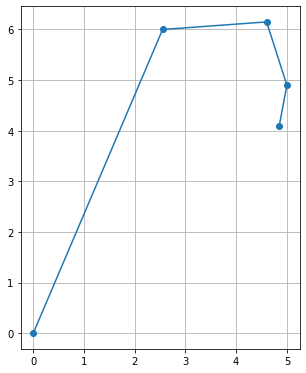

In [11]:
x, y = convertToPlotableValues(S)
plot(x,y)


\section{Vector $\overrightarrow{OP}$}
In this part we're asked to determine the vector $\overrightarrow{OP}$, the vector from origo, to the point P, based on our values for the robotarm. This can be done by taking the sum of our x-values from S, and the sum of our y-values from S:

In [12]:
OP_x = a[0] + b[0] + c[0] + d[0]
OP_y = a[1] + b[1] + c[1] + d[1]
OP = np.array([OP_x, OP_y])

print("Vector OP: \n", OP)

Vector OP: 
 [[4.85]
 [4.1 ]]


\section{Bend in C}
Here we are introduced to the function:
$$bend_c(S) = \m{a|b|c|R_c d},$$
where $R_c$ notates a rotation matrix.
By multiplying a rotation matrix, with a vector, the vector rotates around origo. So a vector $\m{2 \\ 2 }$, rotated $180^{\circ}$, will result in:
$$\m{cos(\pi) && -sin(\pi) \\ sin(\pi) && cos(\pi)}\m{2 \\ 2 } = \m{-2 \\ -2 }$$
This can be applied to this question, since we represents our robotarm ($S$) in sections of vectors, and not static points, and is drawn with the logic used in question A/the 'convertToPlotableValues'-function. It is important to note that this calculation will only be correct when used on $\overrightarrow{CP}$. We will go into deeper details on why that is, in question D.

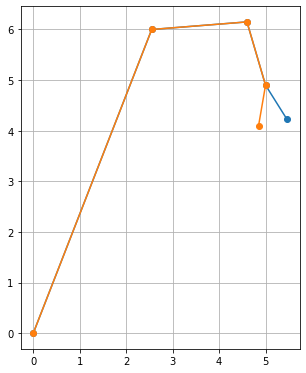

In [13]:
# New matrix to rotate on
SRotateOnC = S.copy()

# Creating rotation matrix
rotationMatrix = rotationMaxtrixByDegrees(45)

# Multiplying the rotation matrix, with the vector d
rotatedByC = rotationMatrix @ d

# Overwriting the previous vector d, with the rotated values
SRotateOnC[0][3] = rotatedByC[0]
SRotateOnC[1][3] = rotatedByC[1]

# Converting the matrix SRotateOnC, to plotable x- and y-values
xRot, yRot = convertToPlotableValues(SRotateOnC)

# Plotting multiple vectors, to display differences. Orange: origional, blue: rotated on point C
plotMultiple([[xRot, yRot], [x, y]])

\section{Bend in A}
Similar to the question above, we here want to bend the robotarm by matrix-multiplication. 
This time we're aiming to rotate the arm in the point A. The process here is different to 'just' rotation in C, as when we want to keep the angles of the other points the same, and this requires us to actually manipulate all points 'down' the arm, from our rotation point. For question C, this required us to only rotate $d$, but here we will have to rotate $b$, $c$ and $d$, i.e. $\overrightarrow{AP}$:
$$bend_a(S) = \m{a|R_a b|R_a c|R_a d}$$

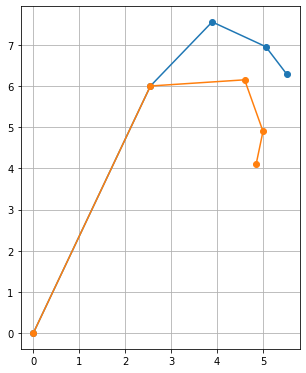

In [16]:
# Creating rotation matrix
rotationMatrix = rotationMaxtrixByDegrees(45)

# Rotating the 'affected' vertices by multiplying all entries after a, with the same rotation matrix
bRot = rotationMatrix @ b
cRot = rotationMatrix @ c
dRot = rotationMatrix @ d

# Creating new 'S' 
SRotationA = np.array([a, bRot, cRot, dRot]).transpose()[0]

# Multiplying the rotation matrix, with the vector d
rotatedByC = rotationMatrix @ d

# Converting the matrix SRotateOnC, to plotable x- and y-values
xRot, yRot = convertToPlotableValues(SRotationA)

# Plotting multiple vectors, to display differences. Orange: origional [x,y], blue: rotated on point A
plotMultiple([[xRot, yRot], [x, y]])

\section{Order of bend}
In this section we're asked to show the equality of 
bend_a(bend_c(S)) = bend_c(bend_a(S))
To do this, we take the definitions from the questions above and apply them like this:
$$bend_a(bend_c(S)) = \m{a|R_a b|R_a c|R_a (R_c d) }$$
$$bend_c(bend_a(S)) = \m{a|R_a b|R_a c|R_c (R_a d) }$$
We see here that for all vectors, except for $d$, the bend results in the same, therefore we focus on the order of calculations for $\overrightarrow{CP}$ here. Firstly we denote the two rotation matrices thus:
$$R_a = \m{c_a && -s_a \\ s_a && c_a}$$
$$R_c =\m{c_c && -s_c \\ s_c && c_c}$$
This leaves us with the following matrix multiplication equations:
$$ \m{c_a && -s_a \\ s_a && c_a}\m{c_c && -s_c \\ s_c && c_c}\m{x\\y} = \m{xc_ac_c - xs_as_c -yc_as_c-ys_ac_c\\ xs_ac_c+xc_as_c-ys_as_c+yc_ac_c}$$
$$ \m{c_c && -s_c \\ s_c && c_c}\m{c_a && -s_a \\ s_a && c_a}\m{x\\y} = \m{xc_cc_a - xs_cs_a -yc_cs_a-ys_cc_a\\ xs_cc_a+xc_cs_a-ys_cs_a+yc_cc_a}$$
We see now that the end product is the same for a double-rotation of $d$, not matter what order we multiply the rotation matrices onto our vector. 